In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from metaflow import Flow, get_metadata
from matplotlib import pyplot as plt

In [3]:
run = Flow('TraderFlow').latest_successful_run
df = run.data.df
df.head()

,A,GOOG,INTC,TSLA,MSFT
Date,,,,,
1999-12-31,47.68,NaN,26.37,NaN,37.56
2000-01-03,44.41,NaN,27.88,NaN,37.50
2000-01-04,41.01,NaN,26.57,NaN,36.23
2000-01-05,38.47,NaN,26.80,NaN,36.61
2000-01-06,37.01,NaN,25.23,NaN,35.38


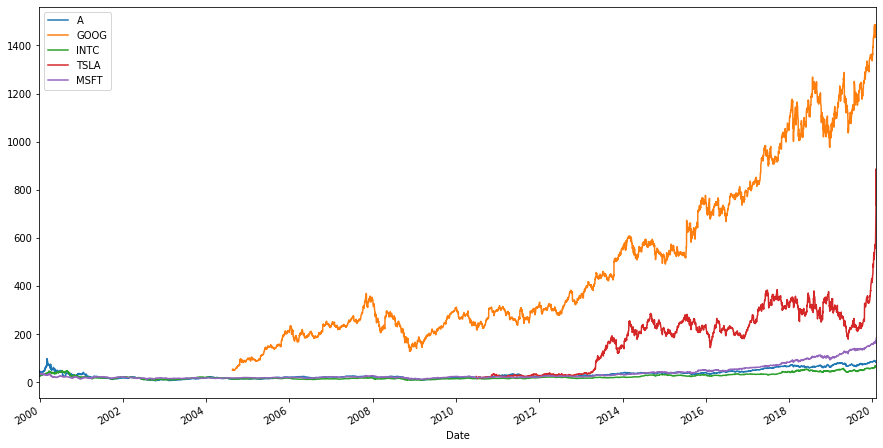

In [5]:
df.plot(figsize=(15,8), logy=False);

In [6]:
def split_sequence(sequence, n_steps):
    X = []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x = sequence[i:end_ix]
        X.append(seq_x)
        
    return np.array(X)

In [11]:
split_sequence(df['TSLA'].dropna(), 7)

array([[ 23.89,  23.83,  21.96, ...,  16.11,  15.8 ,  17.46],
       [ 23.83,  21.96,  19.2 , ...,  15.8 ,  17.46,  17.4 ],
       [ 21.96,  19.2 ,  16.11, ...,  17.46,  17.4 ,  17.05],
       ...,
       [564.82, 558.02, 566.9 , ..., 640.81, 650.57, 780.  ],
       [558.02, 566.9 , 580.99, ..., 650.57, 780.  , 887.06],
       [566.9 , 580.99, 640.81, ..., 780.  , 887.06, 734.7 ]])